In [41]:
import os
from google.cloud import bigquery
from google.auth import default
import pandas as pd
import numpy as np
import math

# Creamos los permisos con la llave para ingresar a Google 
# activamos el servicio
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../Clave_Google/henry-sismos-a343182ba163.json"

project_id = 'your-project-id'
client = bigquery.Client(project=project_id)

In [42]:

# Obtiene las credenciales predeterminadas
credentials, project_id = default()

# Obtiene el correo electrónico del usuario autenticado
user_email = credentials.service_account_email

print(user_email)

henry-992@henry-sismos.iam.gserviceaccount.com


In [43]:

# Crea una instancia del cliente de BigQuery
client = bigquery.Client()

# Obtiene la lista de proyectos del usuario autenticado
projects = client.list_projects()

# Imprime los nombres de los proyectos
project_ids = []
for project in projects:
    project_ids.append(project.project_id) 
project_ids

['henry-sismos']

In [44]:
# Crea una instancia del cliente de BigQuery
client = bigquery.Client()

# Especifica el ID del proyecto
project_id = project_ids[0]


# Obtiene la lista de conjuntos de datos en el proyecto
datasets = client.list_datasets(project=project_id)

# Imprime los nombres de los conjuntos de datos
dataset_ids = []
for dataset in datasets:
    dataset_ids.append(dataset.dataset_id)
dataset_ids

['Sismos']

In [45]:

# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project=project_id)

# Obtiene la referencia al conjunto de datos
dataset_ref = client.dataset(dataset_ids[0])

# Obtiene el conjunto de datos
dataset = client.get_dataset(dataset_ref)

# Obtiene la lista de tablas en el conjunto de datos
tables = client.list_tables(dataset)

# Imprime los nombres de las tablas

table_ids = []
for table in tables:
    table_ids.append(table.table_id)
table_ids

['Colombia', 'Colombia_sismo', 'EEUU_sismo', 'Japan_sismo']

In [46]:
# Creamos el DataFrame de  df_Colombia_sismo
# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project= project_ids[0])

# Especifica el ID del dataset
dataset_id = dataset_ids[0]


table_ref = dataset_ref.table(table_ids[1])
# Descarga la tabla en un DataFrame
table = client.get_table(table_ref)
df_Colombia_sismo = client.list_rows(table).to_dataframe()
            
# Imprime las primeras filas del DataFrame
print(f"Creado el DataFrame de {table_ids[1]}")
print(df_Colombia_sismo.info())
df_Colombia_sismo.head(2)




Creado el DataFrame de Colombia_sismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Fecha       404 non-null    datetime64[ns, UTC]
 1   Magnitud    404 non-null    float64            
 2   Intensidad  404 non-null    float64            
 3   GAP         404 non-null    float64            
 4   Latitud     404 non-null    float64            
 5   Longitud    404 non-null    float64            
 6   Hipocentro  404 non-null    float64            
 7   Lugar       404 non-null    object             
 8   Id          404 non-null    object             
 9   Region      404 non-null    object             
 10  Pais        404 non-null    object             
 11  Act         404 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6), object(4)
memory usage: 38.0+ KB
None


,Fecha,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Lugar,Id,Region,Pais,Act
0,2019-05-12 07:28:08.579000+00:00,4.5,4.3,65.0,3.9341,-73.9292,10.00,"18 km NNW of Cubarral, Colombia",",us70003jzm,",Meta,CO,2023-07-10 00:00:00+00:00
1,2016-12-16 19:45:20.340000+00:00,4.5,2.0,65.0,3.3938,-74.2744,61.75,"25 km W of Mesetas, Colombia",",us200081nl,",Meta,CO,2023-07-10 00:00:00+00:00


In [47]:
# Creamos el DataFrame de  df_EEUU_sismo
# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project= project_ids[0])

# Especifica el ID del dataset
dataset_id = dataset_ids[0]


table_ref = dataset_ref.table(table_ids[2])
# Descarga la tabla en un DataFrame
table = client.get_table(table_ref)
df_EEUU_sismo = client.list_rows(table).to_dataframe()
            
# Imprime las primeras filas del DataFrame
print(f"Creado el DataFrame de {table_ids[2]}")
print(df_EEUU_sismo.info())
df_EEUU_sismo.head(2)



Creado el DataFrame de EEUU_sismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Fecha       3724 non-null   datetime64[ns, UTC]
 1   Magnitud    3724 non-null   float64            
 2   Intensidad  3724 non-null   float64            
 3   GAP         3724 non-null   float64            
 4   Latitud     3724 non-null   float64            
 5   Longitud    3724 non-null   float64            
 6   Hipocentro  3724 non-null   float64            
 7   Lugar       3724 non-null   object             
 8   Id          3724 non-null   object             
 9   Region      3724 non-null   object             
 10  Pais        3724 non-null   object             
 11  Act         3724 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6), object(4)
memory usage: 349.3+ KB
None


,Fecha,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Lugar,Id,Region,Pais,Act
0,2021-06-30 20:24:23.394000+00:00,2.7,3.4,41.0,42.8255,-95.1057,10.0,"4 km E of Rembrandt, Iowa",",us7000ehtv,",Iowa,US,2023-07-10 00:00:00+00:00
1,2021-11-19 19:05:02.051000+00:00,2.6,4.1,52.0,40.5121,-81.2650,5.0,"2 km NW of Sherrodsville, Ohio",",us7000fvjl,",Ohio,US,2023-07-10 00:00:00+00:00


In [48]:
# Creamos el DataFrame de  df_EEUU_sismo
# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project= project_ids[0])

# Especifica el ID del dataset
dataset_id = dataset_ids[0]


table_ref = dataset_ref.table(table_ids[3])


# Descarga la tabla en un DataFrame
table = client.get_table(table_ref)
df_Japan_sismo = client.list_rows(table).to_dataframe()
            
# Imprime las primeras filas del DataFrame
print(f"Creado el DataFrame de {table_ids[3]}")
print(df_Japan_sismo.info())
df_Japan_sismo.head(2)

Creado el DataFrame de Japan_sismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Fecha       3055 non-null   datetime64[ns, UTC]
 1   Magnitud    3055 non-null   float64            
 2   Intensidad  3055 non-null   float64            
 3   GAP         3055 non-null   float64            
 4   Latitud     3055 non-null   float64            
 5   Longitud    3055 non-null   float64            
 6   Hipocentro  3055 non-null   float64            
 7   Lugar       3055 non-null   object             
 8   Id          3055 non-null   object             
 9   Region      3055 non-null   object             
 10  Pais        3055 non-null   object             
 11  Act         3055 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6), object(4)
memory usage: 286.5+ KB
None


,Fecha,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Lugar,Id,Region,Pais,Act
0,2018-09-23 21:33:42.240000+00:00,4.0,2.7,85.0,33.8390,136.6885,377.30,"51 km ESE of Owase, Japan",",us2000hj4d,",Mie,JP,2023-07-10 00:00:00+00:00
1,2014-10-06 12:06:29.220000+00:00,4.0,1.0,72.0,34.0985,136.8656,353.72,"42 km S of Toba, Japan",",usb000snct,",Mie,JP,2023-07-10 00:00:00+00:00


In [49]:
# Unificamos la data y ordenamos por fecha
df_paises_sismos = pd.concat([df_Colombia_sismo, df_Japan_sismo, df_EEUU_sismo], ignore_index=True)

# se dejan las columnas con rangos numericos

df_paises_sismos = df_paises_sismos.drop([ "Lugar", "Fecha",  "Id", "Region", "Pais", "Act"], axis= 1)

# Ajustamos el GAP de 0 a 180 grados
df_paises_sismos["GAP"] =  df_paises_sismos["GAP"].apply(lambda x: x if x <= 180 else 360 - x)

# Mostramos el resultado
print(df_paises_sismos.info())
df_paises_sismos.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Magnitud    7183 non-null   float64
 1   Intensidad  7183 non-null   float64
 2   GAP         7183 non-null   float64
 3   Latitud     7183 non-null   float64
 4   Longitud    7183 non-null   float64
 5   Hipocentro  7183 non-null   float64
dtypes: float64(6)
memory usage: 336.8 KB
None


,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro
0,4.5,4.3,65.0,3.9341,-73.9292,10.00
1,4.5,2.0,65.0,3.3938,-74.2744,61.75
2,5.0,2.0,31.0,3.9157,-71.3594,10.00
3,5.0,4.3,65.0,3.4190,-73.9867,10.00
4,6.0,6.7,36.0,3.5359,-74.0176,11.00


### 1- Categorizamos en una nueva columna llamada "Niv-Inten", los valores de la columnas "Intensidad"

La categorización real de la escala de Intensidad es:<br><br>

I. No se siente.<br>
II. Se siente solo por unas pocas personas en reposo y en posición tranquila.<br>
III. Se siente dentro de los edificios, especialmente en los pisos superiores.<br>
IV. Se siente como un camión pesado que pasa cerca o como una vibración similar al paso de un tren.<br>
V. Se siente ampliamente en el área afectada. Los objetos colgantes pueden oscilar y se pueden escuchar ruidos.<br>
VI. Se siente por todas las personas. Los objetos frágiles se rompen y se pueden producir grietas en las paredes.<br>
VII. Daños menores en las estructuras, como grietas en los muros y caída de revestimientos.<br>
VIII. Daños importantes en las estructuras, como colapso parcial de edificios y chimeneas.<br>
IX. Daños severos en las estructuras, con colapso parcial generalizado.<br>
X. Daños extensos en las estructuras, con colapso de muchos edificios.<br>
XI. Daños de gran alcance, con colapso de la mayoría de los edificios.<br>
XII. Daño total. Las estructuras se desploman y el terreno puede agrietarse y deformarse.<br>

#### Creamos 4 niveles agrupando las categorías
* Nivel 1: Baja intensidad<br>

Categorías: I, II, III<br>
Descripción: Terremotos apenas perceptibles o que solo son percibidos por unas pocas personas en reposo. Sensación similar al paso de un camión pesado o vibración leve.<br><br>


* Nivel 2: Moderada intensidad<br>

Categorías: IV, V, VI<br>
Descripción: Terremotos que son ampliamente percibidos y pueden generar movimientos de objetos colgantes, ruidos y grietas en las paredes. Pueden generar molestias significativas, pero con daños menores en las estructuras.<br><br>


* Nivel 3: Alta intensidad<br>

Categorías: VII, VIII, IX<br>
Descripción: Terremotos que causan daños importantes en las estructuras, con grietas en los muros, colapso parcial de edificios y chimeneas. Los daños pueden ser severos y generalizados, con riesgo de colapso de muchos edificios.<br><br>


* Nivel 4: Muy alta intensidad<br>

Categorías: X, XI, XII<br>
Descripción: Terremotos de gran magnitud que generan daños extensos y colapso de la mayoría o todos los edificios. Los daños son de gran alcance, con deformación y grietas en el terreno.

In [50]:
print(df_paises_sismos["Intensidad"].min()) 
print(df_paises_sismos["Intensidad"].max()) 

0.0
9.1


In [51]:
mes_letras= [
    df_paises_sismos["Intensidad"] < 4,
    df_paises_sismos["Intensidad"] < 6,
    df_paises_sismos["Intensidad"] < 9,
    df_paises_sismos["Intensidad"] < 12
]
opciones_mes_letras = ["Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4"]

df_paises_sismos["Niv-Inten"] = np.select(mes_letras, opciones_mes_letras)



In [52]:
df_paises_sismos["Niv-Inten"].value_counts()

Niv-Inten
Nivel 1    5897
Nivel 2    1145
Nivel 3     138
Nivel 4       3
Name: count, dtype: int64

### 2- Clasificacion del GAP

GAP < 30: Excelente<br>
30 ≤ GAP < 60: Buena<br>
60 ≤ GAP < 90: Razonable<br>
90 ≤ GAP < 120: Pobre<br>
GAP ≥ 120: Muy pobre<br>


* Excelente: Cobertura angular óptima, alta precisión en la ubicación y estimación de la magnitud del terremoto.
* Buena: Cobertura angular adecuada, buena precisión en la ubicación y estimación de la magnitud del terremoto.
* Razonable: Cobertura angular aceptable, precisión razonable en la ubicación y estimación de la magnitud del terremoto.
* Pobre: Cobertura angular deficiente, precisión reducida en la ubicación y estimación de la magnitud del terremoto.
* Muy pobre: Cobertura angular muy deficiente, baja precisión en la ubicación y estimación de la magnitud del terremoto.

In [53]:
mes_letras= [
    df_paises_sismos["GAP"] < 30,
    df_paises_sismos["GAP"] < 60,
    df_paises_sismos["GAP"] < 90,
    df_paises_sismos["GAP"] < 120,
    df_paises_sismos["GAP"] <= 180
]
opciones_mes_letras = ["Excelente", "Bueno", "Razonable", "Pobre", "Muy Pobre"]

df_paises_sismos["Niv-GAP"] = np.select(mes_letras, opciones_mes_letras)
df_paises_sismos["Niv-GAP"].value_counts()


Niv-GAP
Muy Pobre    1798
Bueno        1720
Razonable    1685
Pobre        1371
Excelente     609
Name: count, dtype: int64

In [54]:
# Creamos un supuesto de de una MAGNITUD ESPERADA 'Mag_Esp'


df_paises_sismos["Mag_Esp"] = round( ( df_paises_sismos["GAP"]  / 90) * df_paises_sismos["Magnitud"]  ,2) 
df_paises_sismos

,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Niv-Inten,Niv-GAP,Mag_Esp
0,4.50,4.3,65.0,3.934100,-73.929200,10.000,Nivel 2,Razonable,3.25
1,4.50,2.0,65.0,3.393800,-74.274400,61.750,Nivel 1,Razonable,3.25
2,5.00,2.0,31.0,3.915700,-71.359400,10.000,Nivel 1,Bueno,1.72
3,5.00,4.3,65.0,3.419000,-73.986700,10.000,Nivel 2,Razonable,3.61
4,6.00,6.7,36.0,3.535900,-74.017600,11.000,Nivel 3,Bueno,2.40
...,...,...,...,...,...,...,...,...,...
7178,2.79,4.2,51.0,47.395000,-122.044000,14.750,Nivel 2,Bueno,1.58
7179,2.90,4.3,98.0,43.779600,-71.480300,8.286,Nivel 2,Pobre,3.16
7180,3.24,3.5,43.0,35.579667,-82.872333,0.100,Nivel 1,Bueno,1.55
7181,4.50,3.8,71.0,32.620300,-70.836400,10.000,Nivel 1,Razonable,3.55


# Empezamos Trabajos de Machine Learning  

kmins o dbscan

### 1- Identificación de la data a trabajar

In [55]:

df_paises_sismos["Categoria_Simos"] =  "Categoría de Intensidad " + df_paises_sismos["Niv-Inten"].astype(str)  + " De Gap " +  df_paises_sismos["Niv-GAP"].astype(str)  + " Y con una posible Magnitud de "+ df_paises_sismos["Mag_Esp"].astype(str) + " En un proximo Sismo"
df_MAc_Ler = df_paises_sismos[["Magnitud",  "GAP", "Hipocentro", "Niv-Inten"]]
df_MAc_Ler.head(5)


,Magnitud,GAP,Hipocentro,Niv-Inten
0,4.5,65.0,10.00,Nivel 2
1,4.5,65.0,61.75,Nivel 1
2,5.0,31.0,10.00,Nivel 1
3,5.0,65.0,10.00,Nivel 2
4,6.0,36.0,11.00,Nivel 3


### 2- Reducción de la Dimensionalidad

### Lo malo es que reduce la cantidad de columnas: pasaría de 3 a 2 muy posiblemente
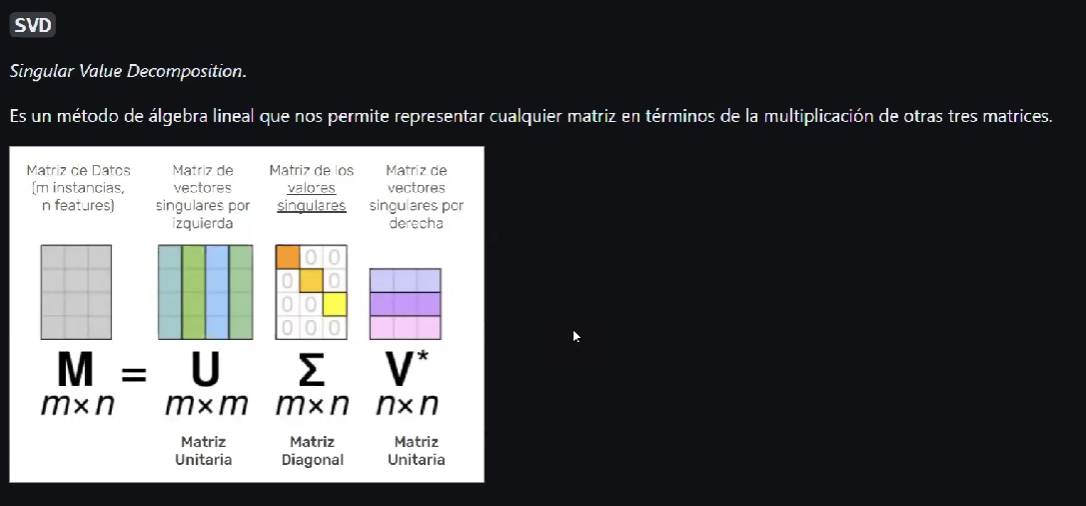<br>
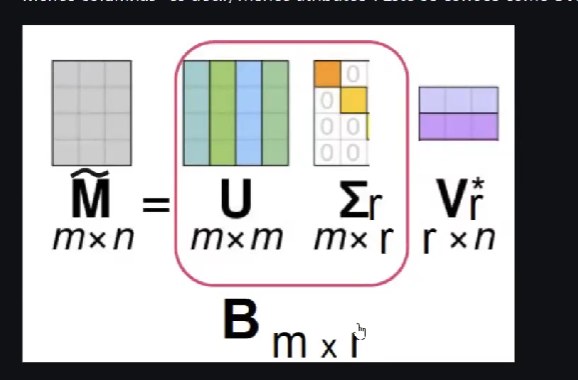

### Seria el mas opcional
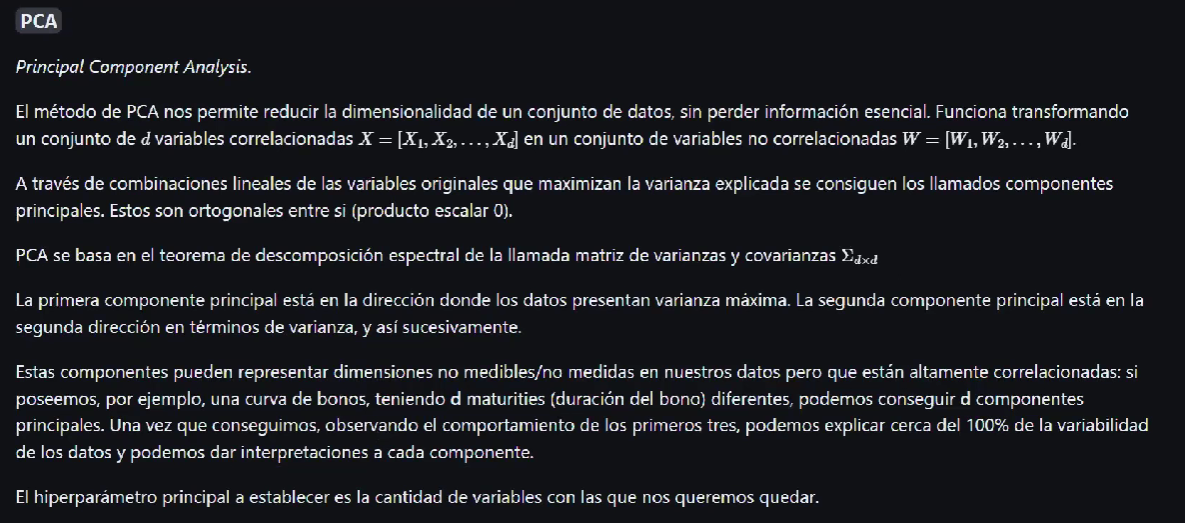<br>
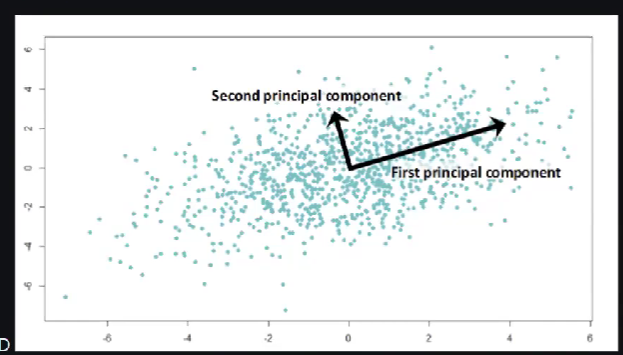<br>
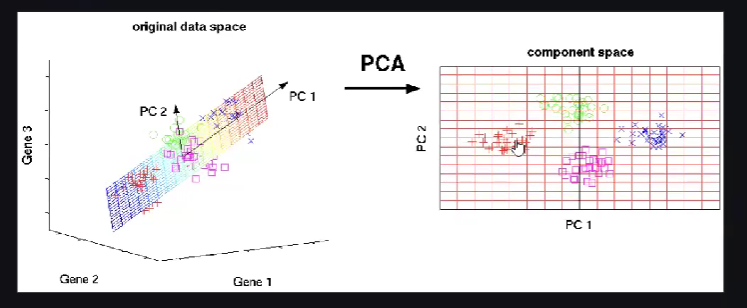<br>


In [56]:
# Creamos un csv df_completo

#df_paises_sismos.to_csv("data_sismos_normalizado.csv", index=False)
